# Capstone Project - Harmanjot Singh - M15025171

In [1]:
# Data Loading and EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Modeling
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Evaluation
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

## Loading Data

We have 3 data files to load and transform into usable dataframes.

<li>bad-drivers.csv</li> 
<li>miles-driven.csv</li>
<li>nst-est2019-01.xlsx</li>
<li>population-density.xlsx</li>

bad-drivers.csv is the main data source that contains total number of fatal collisions and corresponding percentages of different offences that were recorded for involved drivers. miles-driven.csv contains the total miles driven in each state and is used to derive actual collision figures. nst-est2019-01.xlsx contians the population of different states as per 2010 census. it is used to adjust the variable values in bad-drivers.csv according to state population. population-density.xlsx is used to establish relationships between total number of fatal accidents and state population density.

In [2]:
drivers = pd.read_csv("data/bad-drivers.csv")

In [3]:
drivers.head()

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63


In [4]:
miles = pd.read_csv("data/miles-driven.csv", sep = '|')

In [5]:
miles.columns = ['State', 'Million Miles Driven Annually']

In [6]:
miles.head()

,State,Million Miles Driven Annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [7]:
population = pd.read_excel("data/nst-est2019-01.xlsx", header=None, usecols="A:B", skiprows=9, nrows=51)

In [8]:
population.columns = ['State', 'Population']

In [9]:
population.head()

,State,Population
0,.Alabama,4779736
1,.Alaska,710231
2,.Arizona,6392017
3,.Arkansas,2915918
4,.California,37253956


In [10]:
population_density = pd.read_excel("data/population-density.xlsx")

In [11]:
population_density.head()

,State,population_density
0,District of Columbia,9856.5
1,New Jersey,1195.5
2,Rhode Island,1018.1
3,Massachusetts,839.4
4,Connecticut,738.1


## Exploratory Data Analysis
A comprehensive EDA is conducted onto the loaded datasets to ensure these are clean, free from missing values and properly formatted. Then the datasets are transformed into usable dataframe for further analysis. The values are adjusted and standadardized to accomodate differences due to state population. Correlations are analyzed to uncover the relationships between different variables in the data.

In [12]:
round(drivers.describe(), 2)

,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
count,51.00,51.00,51.00,51.00,51.00,51.00,51.00
mean,15.79,31.73,30.69,85.92,88.73,886.96,134.49
std,4.12,9.63,5.13,15.16,6.96,178.30,24.84
min,5.90,13.00,16.00,10.00,76.00,641.96,82.75
25%,12.75,23.00,28.00,83.00,83.50,768.43,114.64
50%,15.60,34.00,30.00,88.00,88.00,858.97,136.05
75%,18.50,38.00,33.00,95.00,95.00,1007.94,151.87
max,23.90,54.00,44.00,100.00,100.00,1301.52,194.78


In [13]:
drivers.isnull().sum()

State                                                                                                     0
Number of drivers involved in fatal collisions per billion miles                                          0
Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding                                      0
Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired                              0
Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted                                0
Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents    0
Car Insurance Premiums ($)                                                                                0
Losses incurred by insurance companies for collisions per insured driver ($)                              0
dtype: int64

In [14]:
print('Shape of data:', drivers.shape)

Shape of data: (51, 8)


In [15]:
print(drivers.dtypes)

State                                                                                                      object
Number of drivers involved in fatal collisions per billion miles                                          float64
Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding                                        int64
Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired                                int64
Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted                                  int64
Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents      int64
Car Insurance Premiums ($)                                                                                float64
Losses incurred by insurance companies for collisions per insured driver ($)                              float64
dtype: object


In [16]:
population['State'] = population['State'].str.replace('.', '')

/var/folders/6c/wzvwmzjn7s1919mkxdrsxhv00000gn/T/ipykernel_16637/312934560.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  population['State'] = population['State'].str.replace('.', '')


In [17]:
population.head()

,State,Population
0,Alabama,4779736
1,Alaska,710231
2,Arizona,6392017
3,Arkansas,2915918
4,California,37253956


In [18]:
print(population.dtypes)

State         object
Population     int64
dtype: object


In [19]:
df = pd.merge(drivers, population, on='State').merge(miles, on = 'State')

In [20]:
df.shape

(51, 10)

In [21]:
df.head()

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($),Population,Million Miles Driven Annually
0,Alabama,18.8,39,30,96,80,784.55,145.08,4779736,64914
1,Alaska,18.1,41,25,90,94,1053.48,133.93,710231,4593
2,Arizona,18.6,35,28,84,96,899.47,110.35,6392017,59575
3,Arkansas,22.4,18,26,94,95,827.34,142.39,2915918,32953
4,California,12.0,35,28,91,89,878.41,165.63,37253956,320784


#### Converting % figures to actual numbers

Total number of drivers involved in fatal crashes

In [22]:
df['Number of drivers involved in fatal collisions'] = (df['Number of drivers involved in fatal collisions per billion miles'] * df['Million Miles Driven Annually']) / 1000

In [23]:
df.head()

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($),Population,Million Miles Driven Annually,Number of drivers involved in fatal collisions
0,Alabama,18.8,39,30,96,80,784.55,145.08,4779736,64914,1220.3832
1,Alaska,18.1,41,25,90,94,1053.48,133.93,710231,4593,83.1333
2,Arizona,18.6,35,28,84,96,899.47,110.35,6392017,59575,1108.0950
3,Arkansas,22.4,18,26,94,95,827.34,142.39,2915918,32953,738.1472
4,California,12.0,35,28,91,89,878.41,165.63,37253956,320784,3849.4080


In [24]:
df['Number Of Drivers Involved In Fatal Collisions Who Were Speeding'] = (df['Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding']*df['Number of drivers involved in fatal collisions'])/100
df['Number Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired'] = (df['Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired']*df['Number of drivers involved in fatal collisions'])/100
df['Number Of Drivers Involved In Fatal Collisions Who Were Not Distracted'] = (df['Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted']*df['Number of drivers involved in fatal collisions'])/100
df['Number Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents'] = (df['Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents']*df['Number of drivers involved in fatal collisions'])/100

# Adjusting by population

In [25]:
df['Number Of Drivers Involved In Fatal Collisions Who Were Speeding per 100000'] = (df['Number Of Drivers Involved In Fatal Collisions Who Were Speeding']/df['Population'])*100000
df['Number Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired per 100000'] = (df['Number Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired']/df['Population'])*100000
df['Number Of Drivers Involved In Fatal Collisions Who Were Not Distracted per 100000'] = (df['Number Of Drivers Involved In Fatal Collisions Who Were Not Distracted']/df['Population'])*100000
df['Number Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents per 100000'] = (df['Number Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents']/df['Population'])*100000

In [26]:
df['Number of drivers involved in fatal collisions per 100000'] = (df['Number of drivers involved in fatal collisions']/df['Population'])*100000

In [27]:
df.head()

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($),Population,Million Miles Driven Annually,Number of drivers involved in fatal collisions,Number Of Drivers Involved In Fatal Collisions Who Were Speeding,Number Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Number Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Number Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Number Of Drivers Involved In Fatal Collisions Who Were Speeding per 100000,Number Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired per 100000,Number Of Drivers Involved In Fatal Collisions Who Were Not Distracted per 100000,Number Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents per 100000,Number of drivers involved in fatal collisions per 100000
0,Alabama,18.8,39,30,96,80,784.55,145.08,4779736,64914,1220.3832,475.949448,366.114960,1171.567872,976.306560,9.957651,7.659732,24.511142,20.425952,25.532439
1,Alaska,18.1,41,25,90,94,1053.48,133.93,710231,4593,83.1333,34.084653,20.783325,74.819970,78.145302,4.799094,2.926277,10.534596,11.002801,11.705107
2,Arizona,18.6,35,28,84,96,899.47,110.35,6392017,59575,1108.0950,387.833250,310.266600,930.799800,1063.771200,6.067463,4.853970,14.561911,16.642184,17.335608
3,Arkansas,22.4,18,26,94,95,827.34,142.39,2915918,32953,738.1472,132.866496,191.918272,693.858368,701.239840,4.556592,6.581744,23.795538,24.048682,25.314402
4,California,12.0,35,28,91,89,878.41,165.63,37253956,320784,3849.4080,1347.292800,1077.834240,3502.961280,3425.973120,3.616509,2.893207,9.402924,9.196267,10.332884


In [28]:
# df.to_csv("data/df.csv")

In [29]:
df_adjusted = df[["State", "Number Of Drivers Involved In Fatal Collisions Who Were Speeding per 100000", "Number Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired per 100000", "Number Of Drivers Involved In Fatal Collisions Who Were Not Distracted per 100000", "Number Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents per 100000", "Number of drivers involved in fatal collisions per 100000"]]

In [30]:
df_adjusted = round(df_adjusted, 0)

In [31]:
df_adjusted.head()

,State,Number Of Drivers Involved In Fatal Collisions Who Were Speeding per 100000,Number Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired per 100000,Number Of Drivers Involved In Fatal Collisions Who Were Not Distracted per 100000,Number Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents per 100000,Number of drivers involved in fatal collisions per 100000
0,Alabama,10.0,8.0,25.0,20.0,26.0
1,Alaska,5.0,3.0,11.0,11.0,12.0
2,Arizona,6.0,5.0,15.0,17.0,17.0
3,Arkansas,5.0,7.0,24.0,24.0,25.0
4,California,4.0,3.0,9.0,9.0,10.0


In [32]:
round(df_adjusted.describe(), 2)

,Number Of Drivers Involved In Fatal Collisions Who Were Speeding per 100000,Number Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired per 100000,Number Of Drivers Involved In Fatal Collisions Who Were Not Distracted per 100000,Number Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents per 100000,Number of drivers involved in fatal collisions per 100000
count,51.00,51.00,51.0,51.00,51.00
mean,5.12,5.06,14.0,14.47,16.29
std,2.39,2.41,6.2,5.68,6.29
min,1.00,1.00,2.0,3.00,3.00
25%,4.00,3.00,9.0,10.00,11.50
50%,5.00,5.00,14.0,14.00,16.00
75%,7.00,6.00,17.0,18.00,21.00
max,12.00,14.00,32.0,28.00,32.00


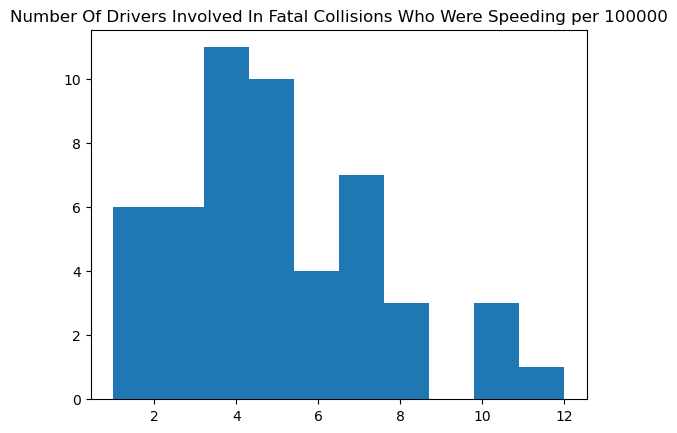

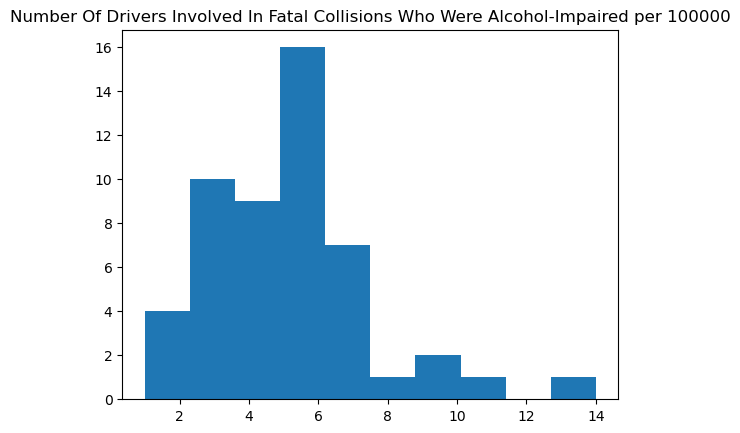

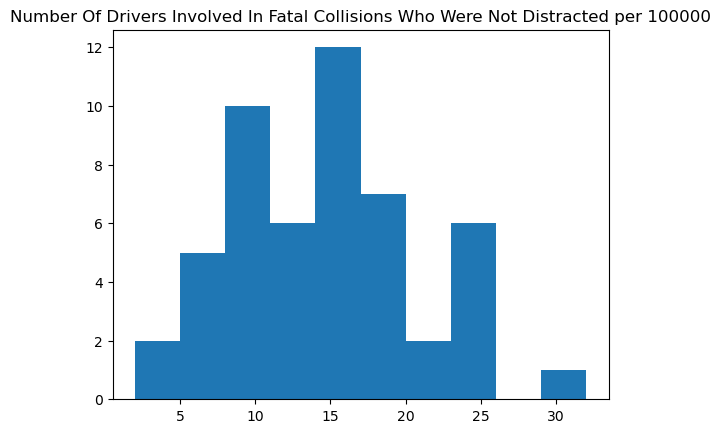

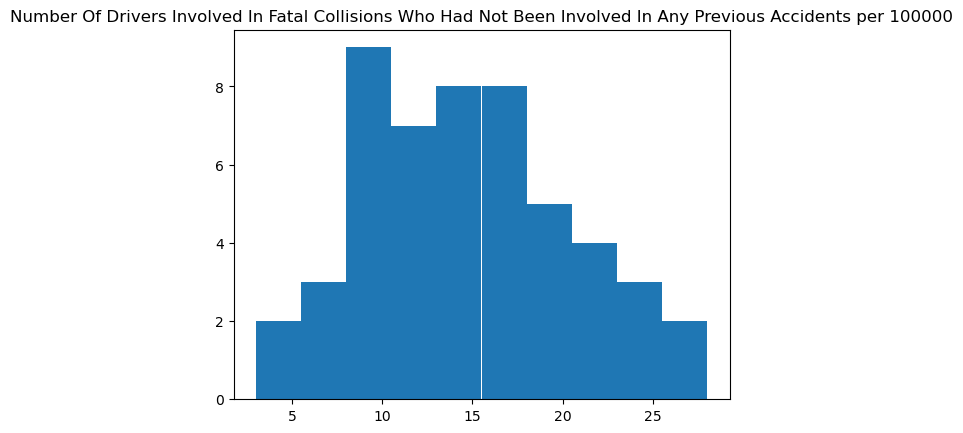

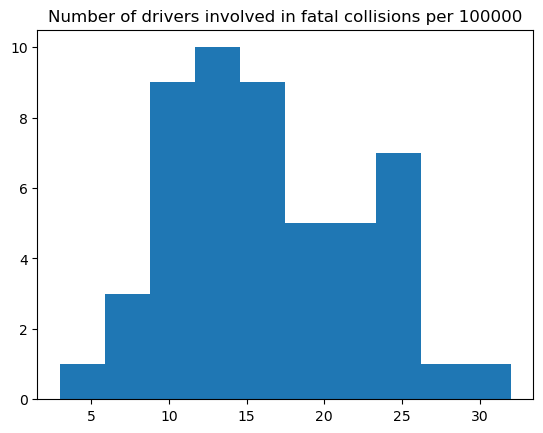

In [33]:
To_plot=df_adjusted.iloc[:,1:]
for i in To_plot:
    plt.figure()
    plt.title(label=i)
    plt.hist(df_adjusted[i])
    plt.show()

The strength of a Pearson correlation coefficients can be quantified as:
<ul>
<li>0.00 − 0.19 is a very weak correlation/no correlation.</li>
<li>0.2 − 0.39 a weak correlation.</li>
<li>0.4 − 0.59 is a moderate correlation.</li>
<li>0.6 − 0.79 is a strong correlation.</li>
<li>0.8 − 1 is a very strong correlation.</li>

In [34]:
df_adjusted.corr()

,Number Of Drivers Involved In Fatal Collisions Who Were Speeding per 100000,Number Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired per 100000,Number Of Drivers Involved In Fatal Collisions Who Were Not Distracted per 100000,Number Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents per 100000,Number of drivers involved in fatal collisions per 100000
Number Of Drivers Involved In Fatal Collisions Who Were Speeding per 100000,1.000000,0.731298,0.698544,0.661142,0.696775
Number Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired per 100000,0.731298,1.000000,0.813651,0.868747,0.898358
Number Of Drivers Involved In Fatal Collisions Who Were Not Distracted per 100000,0.698544,0.813651,1.000000,0.801790,0.855711
Number Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents per 100000,0.661142,0.868747,0.801790,1.000000,0.974022
Number of drivers involved in fatal collisions per 100000,0.696775,0.898358,0.855711,0.974022,1.000000


/var/folders/6c/wzvwmzjn7s1919mkxdrsxhv00000gn/T/ipykernel_16637/1042654175.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_adjusted.corr(), dtype=np.bool))


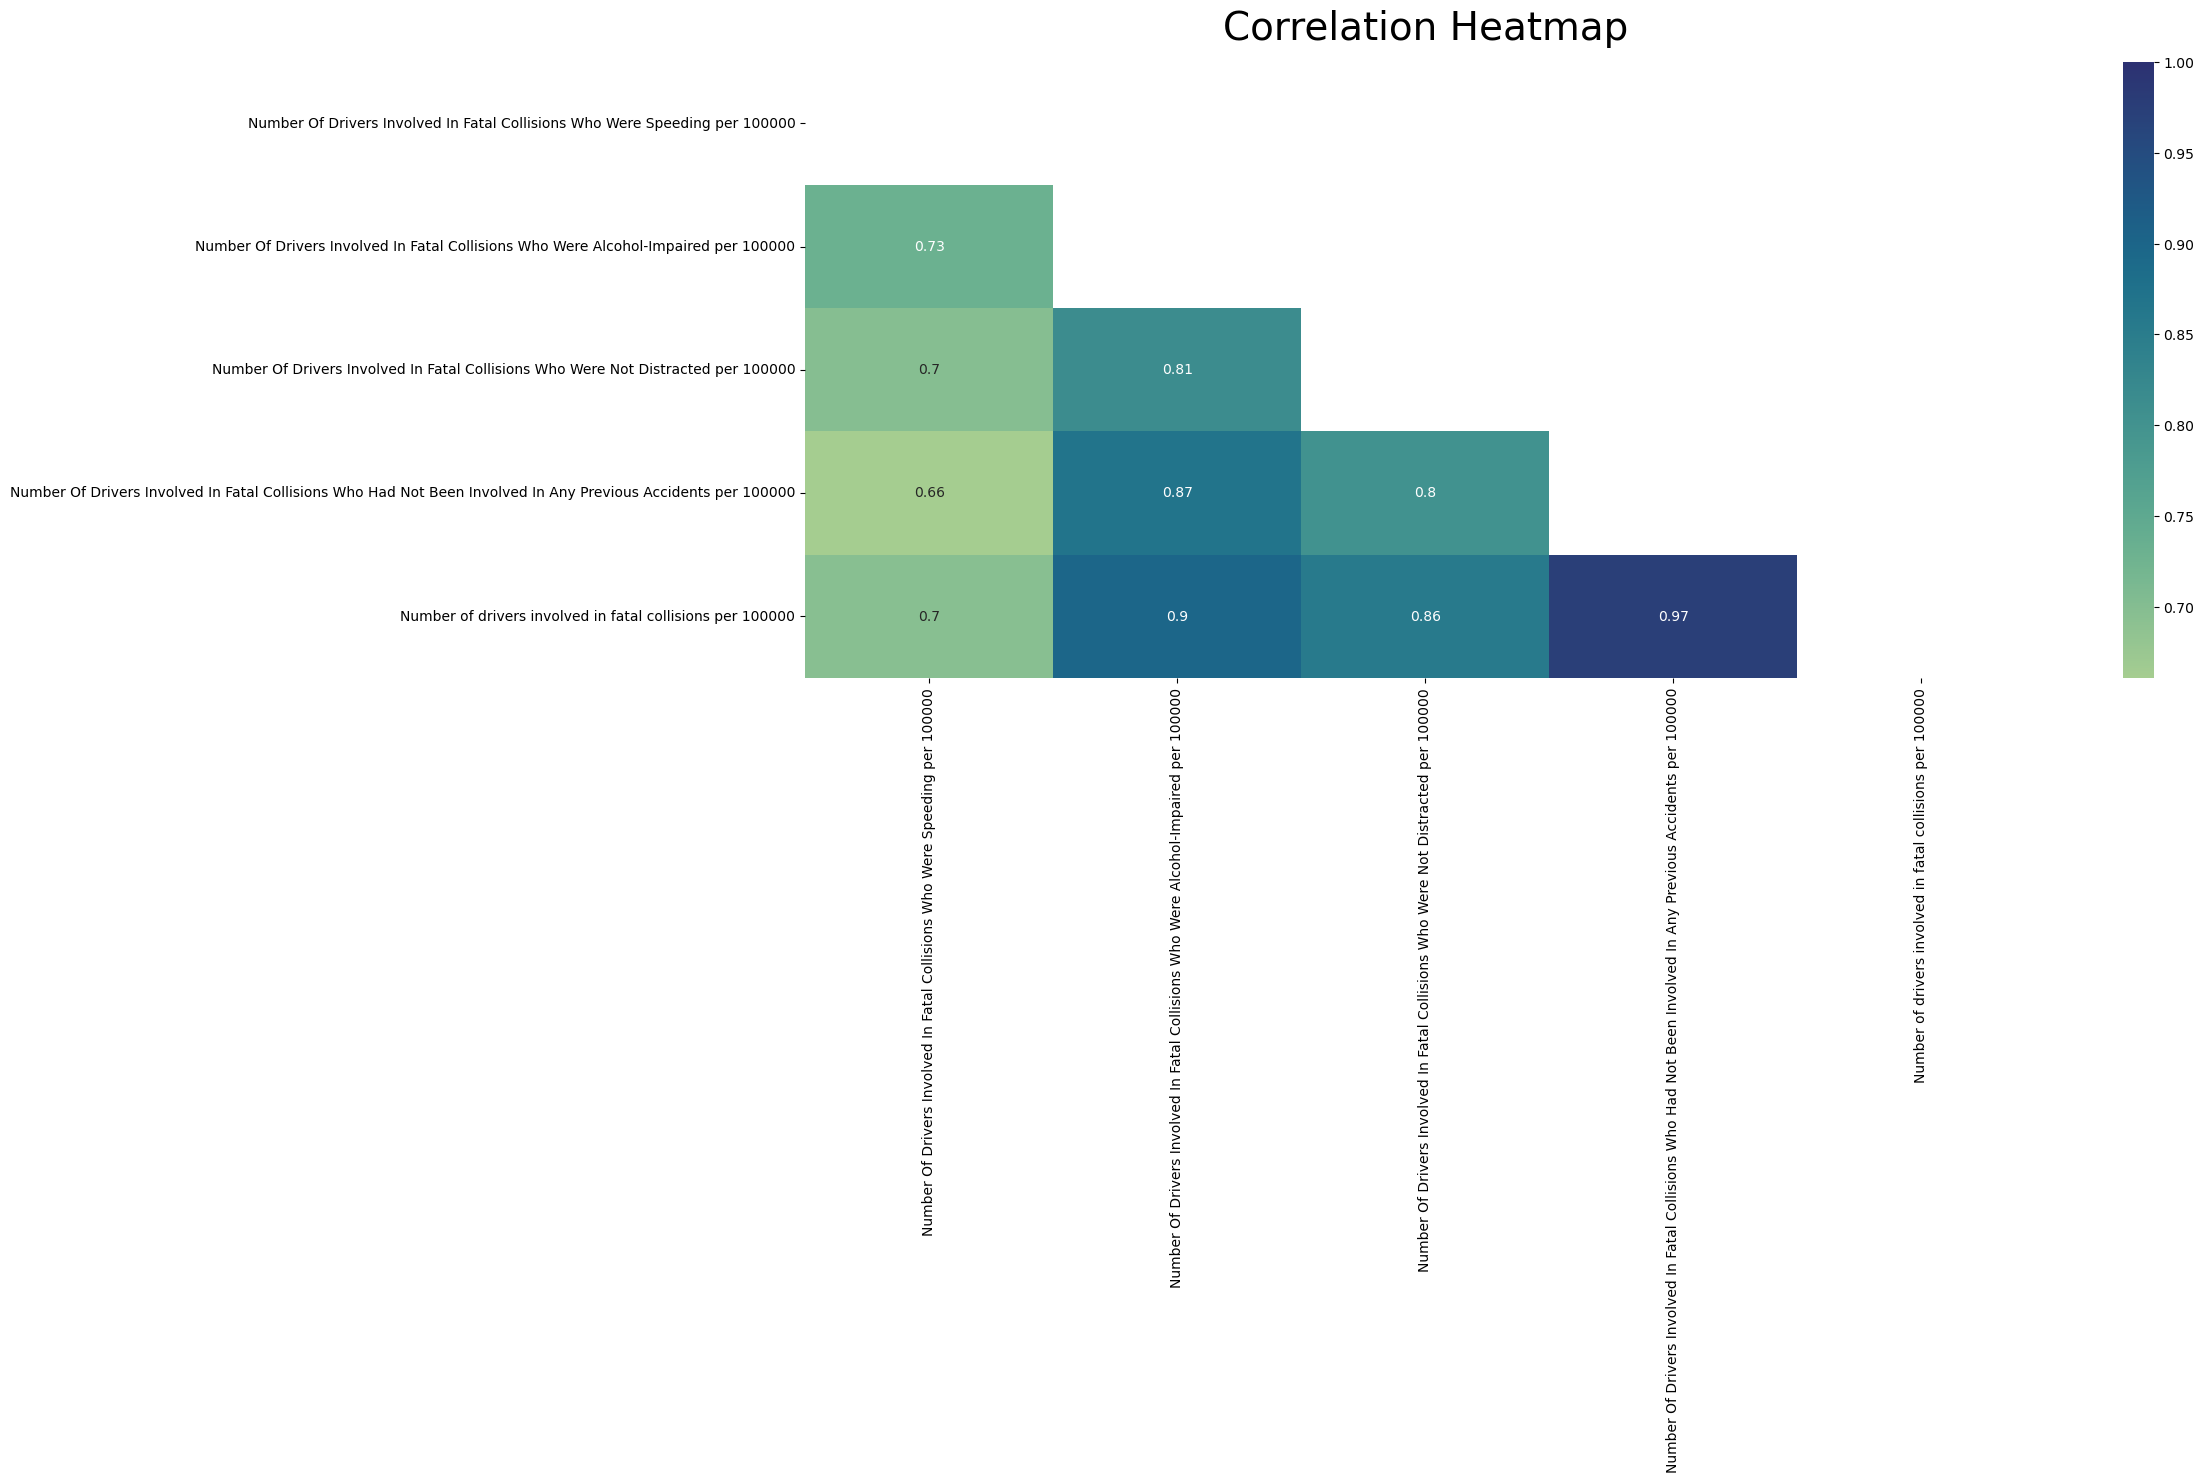

In [35]:
plt.figure(figsize=(20, 8))
mask = np.triu(np.ones_like(df_adjusted.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_adjusted.corr(), mask=mask, vmax=1, annot=True, cmap='crest') #vmin=-1, cmap='BrBG'
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':28}, pad=16);

In [36]:
x = df_adjusted.iloc[:, 1:]

In [37]:
x.head()

,Number Of Drivers Involved In Fatal Collisions Who Were Speeding per 100000,Number Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired per 100000,Number Of Drivers Involved In Fatal Collisions Who Were Not Distracted per 100000,Number Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents per 100000,Number of drivers involved in fatal collisions per 100000
0,10.0,8.0,25.0,20.0,26.0
1,5.0,3.0,11.0,11.0,12.0
2,6.0,5.0,15.0,17.0,17.0
3,5.0,7.0,24.0,24.0,25.0
4,4.0,3.0,9.0,9.0,10.0


In [38]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(x)

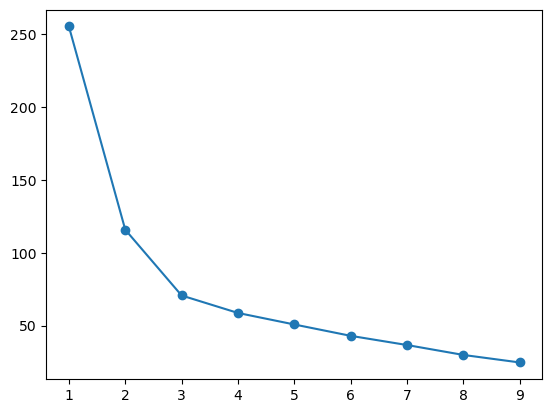

In [39]:
inertias = []
n = range(1, 10)
for k in n:
    km = KMeans(n_clusters=k, init='k-means++', random_state = 0)
    km.fit(features_scaled)
    inertias.append(km.inertia_)

plt.plot(n, inertias, marker='o')

In [40]:
km = KMeans(n_clusters = 3, init='k-means++', random_state = 0)
km.fit(features_scaled)

KMeans(n_clusters=3, random_state=0)

In [41]:
df_adjusted['k_means_clusters'] = km.labels_

In [42]:
df_adjusted.head()

,State,Number Of Drivers Involved In Fatal Collisions Who Were Speeding per 100000,Number Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired per 100000,Number Of Drivers Involved In Fatal Collisions Who Were Not Distracted per 100000,Number Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents per 100000,Number of drivers involved in fatal collisions per 100000,k_means_clusters
0,Alabama,10.0,8.0,25.0,20.0,26.0,2
1,Alaska,5.0,3.0,11.0,11.0,12.0,0
2,Arizona,6.0,5.0,15.0,17.0,17.0,1
3,Arkansas,5.0,7.0,24.0,24.0,25.0,2
4,California,4.0,3.0,9.0,9.0,10.0,0


In [43]:
cluster_summary = df_adjusted.groupby('k_means_clusters')['Number of drivers involved in fatal collisions per 100000'].agg(['count', 'mean', 'sum'])
cluster_summary

,count,mean,sum
k_means_clusters,,,
0,19,10.210526,194.0
1,24,17.750000,426.0
2,8,26.375000,211.0


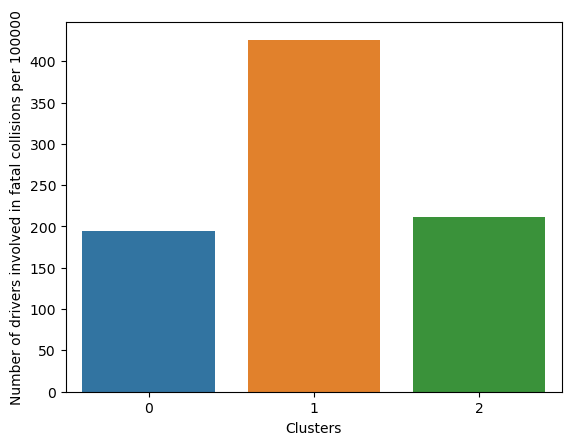

In [44]:
fig = sns.barplot(x = 'k_means_clusters', y = 'Number of drivers involved in fatal collisions per 100000', data = df_adjusted, estimator = sum, ci = None)
fig.set(xlabel='Clusters')
plt.show()

In [45]:
ch_score = calinski_harabasz_score(x, km.labels_)
db_score = davies_bouldin_score(x, km.labels_)
sil_score = silhouette_score(x, km.labels_, metric="euclidean")

In [46]:
km_scores = pd.DataFrame([['K-Means Clustering',ch_score, db_score, sil_score]],
                           columns = ['Model','Calinski Harabasz Score','Davies Bouldin Score','Silhouette Score'])
km_scores

,Model,Calinski Harabasz Score,Davies Bouldin Score,Silhouette Score
0,K-Means Clustering,77.881575,0.671566,0.462721


### Heirarchical Clustering

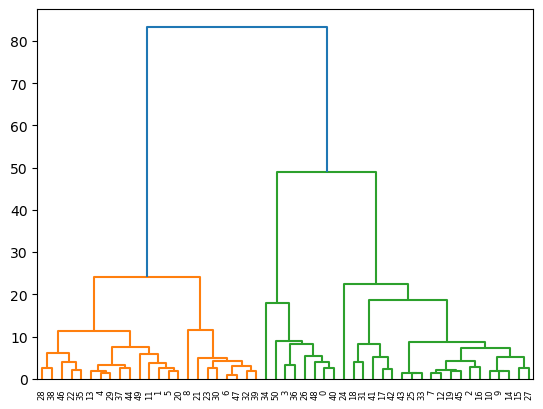

In [47]:
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))

In [48]:
model = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
model.fit(x)
labels = model.labels_

In [49]:
df_adjusted['heirarchical_clusters'] = model.labels_

In [50]:
df_adjusted.head()

,State,Number Of Drivers Involved In Fatal Collisions Who Were Speeding per 100000,Number Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired per 100000,Number Of Drivers Involved In Fatal Collisions Who Were Not Distracted per 100000,Number Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents per 100000,Number of drivers involved in fatal collisions per 100000,k_means_clusters,heirarchical_clusters
0,Alabama,10.0,8.0,25.0,20.0,26.0,2,2
1,Alaska,5.0,3.0,11.0,11.0,12.0,0,0
2,Arizona,6.0,5.0,15.0,17.0,17.0,1,1
3,Arkansas,5.0,7.0,24.0,24.0,25.0,2,2
4,California,4.0,3.0,9.0,9.0,10.0,0,0


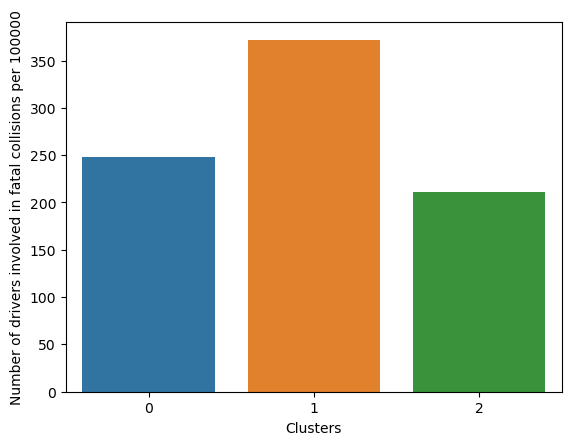

In [51]:
fig = sns.barplot(x = 'heirarchical_clusters', y = 'Number of drivers involved in fatal collisions per 100000', data = df_adjusted, estimator = sum, ci = None)
fig.set(xlabel='Clusters')
plt.show()

In [52]:
cluster_summary_h = df_adjusted.groupby('heirarchical_clusters')['Number of drivers involved in fatal collisions per 100000'].agg(['count', 'mean', 'sum'])
cluster_summary_h

,count,mean,sum
heirarchical_clusters,,,
0,23,10.782609,248.0
1,20,18.600000,372.0
2,8,26.375000,211.0


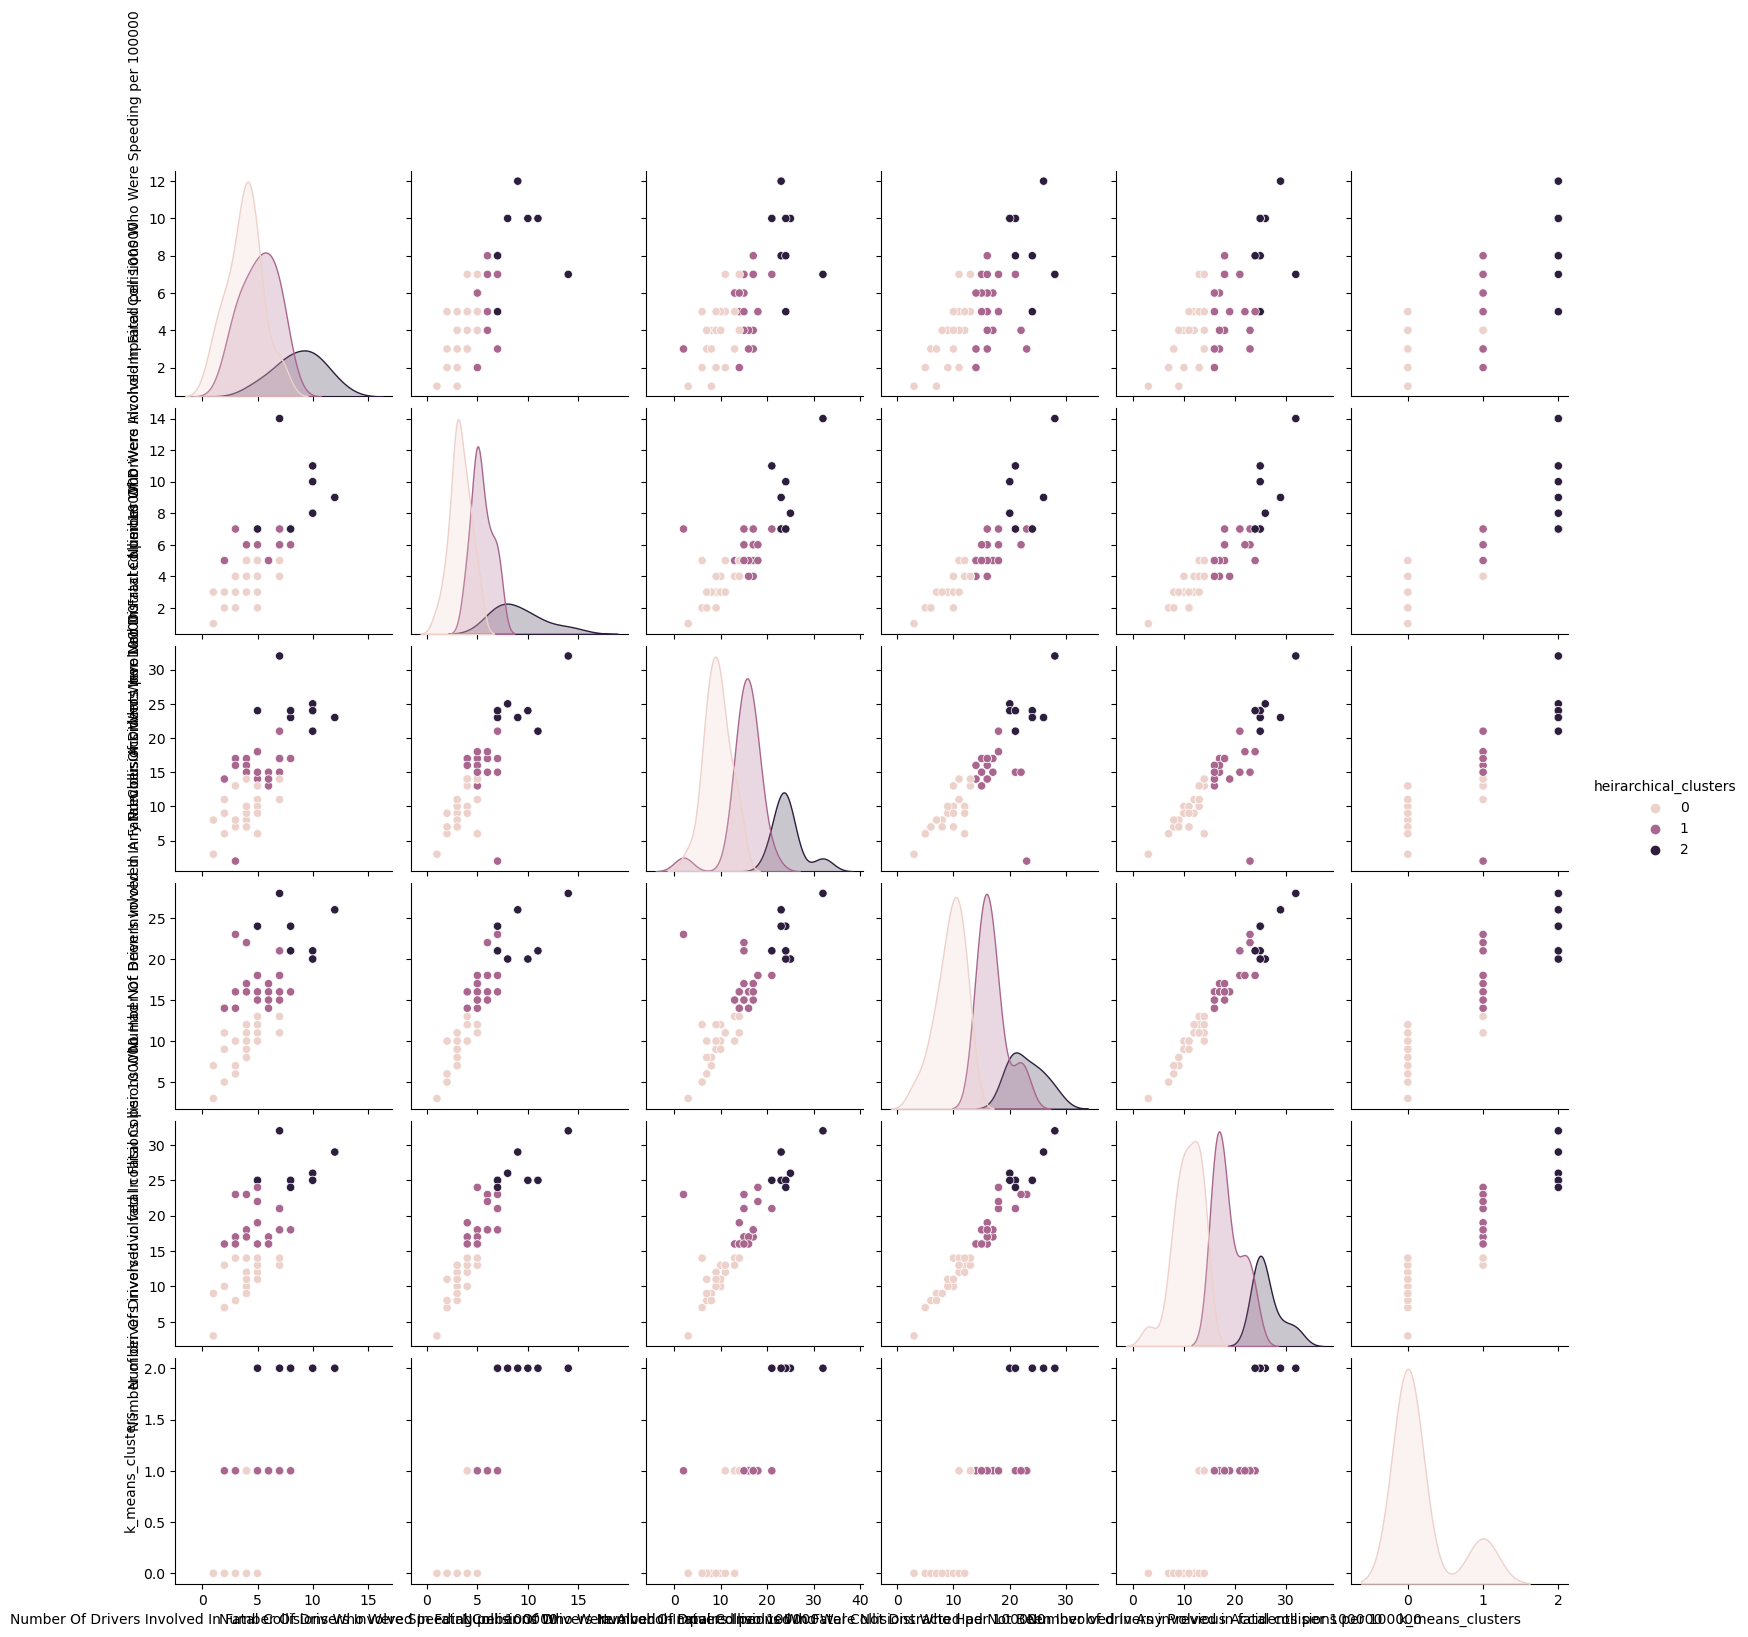

In [53]:
sns.pairplot(df_adjusted, hue='heirarchical_clusters')

In [54]:
ch_score_h = calinski_harabasz_score(x, model.labels_)
db_score_h = davies_bouldin_score(x, model.labels_)
sil_score_h = silhouette_score(x, model.labels_, metric="euclidean")

In [55]:
hr_scores = pd.DataFrame([['Heirarchical Clustering',ch_score_h, db_score_h, sil_score_h]],
                           columns = ['Model','Calinski Harabasz Score','Davies Bouldin Score','Silhouette Score'])
hr_scores

,Model,Calinski Harabasz Score,Davies Bouldin Score,Silhouette Score
0,Heirarchical Clustering,79.766454,0.689543,0.475878


In [56]:
models = ['K-Means Clustering', 'Heirarchical Clustering']

chs = [ch_score, ch_score_h]
dbs = [db_score, db_score_h]
ss = [sil_score, sil_score_h]

In [57]:
dic = {'Calinski Harabasz Score' : chs, 'Davies Bouldin Score' : dbs, 'Silhouette Score' : ss}
metrics_table = pd.DataFrame(dic, index = models)
metrics_table

,Calinski Harabasz Score,Davies Bouldin Score,Silhouette Score
K-Means Clustering,77.881575,0.671566,0.462721
Heirarchical Clustering,79.766454,0.689543,0.475878


In [58]:
(
    df_adjusted
    .query("k_means_clusters != heirarchical_clusters")
)

,State,Number Of Drivers Involved In Fatal Collisions Who Were Speeding per 100000,Number Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired per 100000,Number Of Drivers Involved In Fatal Collisions Who Were Not Distracted per 100000,Number Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents per 100000,Number of drivers involved in fatal collisions per 100000,k_means_clusters,heirarchical_clusters
11,Hawaii,7.0,5.0,11.0,11.0,13.0,1,0
28,Nevada,5.0,4.0,13.0,13.0,13.0,1,0
35,Ohio,4.0,5.0,14.0,11.0,14.0,1,0
38,Pennsylvania,7.0,4.0,14.0,13.0,14.0,1,0


Both models are close in terms of metrics and actual clusters defined as well. Since we are categorizing states and devise corrective measures to be taken, we prioritize having coherent and distinct clusters. Hence, the K-Means Clustering model could be a suitable choice.

In [59]:
cluster_summary

,count,mean,sum
k_means_clusters,,,
0,19,10.210526,194.0
1,24,17.750000,426.0
2,8,26.375000,211.0


Now, we analyze the difference between clusters and categorize them. For example, in cluster 2, there are only 8 states that have on an average ~26 fatal collisions per 100000! This is alarmingly high as compared to other clusters. Looking at the average number of collisions in the states, we can segment them into following categories:

### Cluster 0
Low Fatalities States or Safer States : 19 states with comparably lower number of fatalities (~ Average 10 per 100000 residents).
### Cluster 1
Medium Fatalities States or Moderate States: 24 states with comparably medium number of fatalities (~ Average 18 per 100000 residents).
### Cluster 2
High Fatalities States or Risky States : 8 states with comparably higher number of fatalities (~ Average 26 per 100000 residents).

For our analysis, Let's focus on clusters in the decreasing order of priority. We first start with Cluster 2, because it need immediate attention based on our modeling.

## Analyzing Cluster 2

### High Fatalities States or Risky States

Most number of drivers reported to be overspeeding while involved in fatal collisions are reported in these Cluster 2 states:
#### Wyoming, South Carolina, Montana, Alabama, West Virginia, Oklahoma

Hence, speeding is a concern in these states. Fines can range from $50 to $2,500 across the country, varying by state and how much over the speed limit the driver were traveling. Let us look at the legal penality criteria in these states.

In [60]:
(
    df_adjusted
    .groupby(['k_means_clusters', 'State'], as_index = False)
    .agg({'Number Of Drivers Involved In Fatal Collisions Who Were Speeding per 100000': 'mean'})
    .sort_values(by='Number Of Drivers Involved In Fatal Collisions Who Were Speeding per 100000', ascending=False)
)

,k_means_clusters,State,Number Of Drivers Involved In Fatal Collisions Who Were Speeding per 100000
50,2,Wyoming,12.0
48,2,South Carolina,10.0
45,2,Montana,10.0
43,2,Alabama,10.0
49,2,West Virginia,8.0
47,2,Oklahoma,8.0
32,1,Missouri,8.0
38,1,Pennsylvania,7.0
29,1,Louisiana,7.0
36,1,North Carolina,7.0


In [61]:
(
    df_adjusted
    .query("k_means_clusters == 2")
    .groupby('State', as_index = False)
    .agg({'Number of drivers involved in fatal collisions per 100000': 'mean'})
    .sort_values(by='Number of drivers involved in fatal collisions per 100000', ascending=False)
)

,State,Number of drivers involved in fatal collisions per 100000
3,North Dakota,32.0
7,Wyoming,29.0
0,Alabama,26.0
1,Arkansas,25.0
2,Montana,25.0
4,Oklahoma,25.0
5,South Carolina,25.0
6,West Virginia,24.0


We also saw there was a high correlation between drivers who were reported speeding and those who were reported as alcohol impaired. Let us see if that trend holds for this cluster as well.

In [66]:
(
    df1
    .groupby(['k_means_clusters', 'State'], as_index = False)
    .agg({'Number Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired per 100000': 'mean'})
    .sort_values(by='Number Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired per 100000', ascending=False)
)

,k_means_clusters,State,Number Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired per 100000
46,2,North Dakota,14.0
45,2,Montana,11.0
48,2,South Carolina,10.0
50,2,Wyoming,9.0
43,2,Alabama,8.0
49,2,West Virginia,7.0
47,2,Oklahoma,7.0
44,2,Arkansas,7.0
29,1,Louisiana,7.0
41,1,Texas,7.0


Drivers from all the 8 states of cluster 2 (Wyoming, South Carolina, Montana, Alabama, West Virginia, Oklahoma, Arkansas, North Dakota) were reported alcohol impaired at the time of collisions. North Dakota and Arkansas drivers were reported as not overspeeding or speeding as compared to moderate states. North Dakota has lower fines as well. Arkansas, on the other hand, has stricter penalties for speeding, hence it is further down on the list of speeding states.

In [67]:
df1 = pd.merge(df_adjusted, population_density, on='State')

In [68]:
df1.head()

,State,Number Of Drivers Involved In Fatal Collisions Who Were Speeding per 100000,Number Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired per 100000,Number Of Drivers Involved In Fatal Collisions Who Were Not Distracted per 100000,Number Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents per 100000,Number of drivers involved in fatal collisions per 100000,k_means_clusters,heirarchical_clusters,population_density
0,Alabama,10.0,8.0,25.0,20.0,26.0,2,2,94.4
1,Alaska,5.0,3.0,11.0,11.0,12.0,0,0,1.2
2,Arizona,6.0,5.0,15.0,17.0,17.0,1,1,56.3
3,Arkansas,5.0,7.0,24.0,24.0,25.0,2,2,56.0
4,California,4.0,3.0,9.0,9.0,10.0,0,0,239.1


In [69]:
(
    df1[['k_means_clusters',
         'State',
         'Number of drivers involved in fatal collisions per 100000',
         'population_density']]
    .sort_values(by='population_density', ascending=True)
)

,k_means_clusters,State,Number of drivers involved in fatal collisions per 100000,population_density
1,0,Alaska,12.0,1.2
50,2,Wyoming,29.0,5.8
26,2,Montana,25.0,6.8
34,2,North Dakota,32.0,9.7
41,1,South Dakota,21.0,10.7
31,1,New Mexico,23.0,17.0
12,1,Idaho,16.0,19.0
27,1,Nebraska,16.0,23.8
28,1,Nevada,13.0,24.6
44,0,Utah,11.0,33.6


In [70]:
round((
    df1
    .groupby('k_means_clusters', as_index = False)
    .agg({'population_density': 'mean',
          'Number Of Drivers Involved In Fatal Collisions Who Were Speeding per 100000': 'mean',
          'Number Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired per 100000': 'mean',
          'Number Of Drivers Involved In Fatal Collisions Who Were Not Distracted per 100000': 'mean',
          'Number Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents per 100000': 'mean',
          'Number of drivers involved in fatal collisions per 100000': 'mean'
         })
), 2)

,k_means_clusters,population_density,Number Of Drivers Involved In Fatal Collisions Who Were Speeding per 100000,Number Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired per 100000,Number Of Drivers Involved In Fatal Collisions Who Were Not Distracted per 100000,Number Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents per 100000,Number of drivers involved in fatal collisions per 100000
0,0,844.43,3.42,3.05,8.47,8.89,10.21
1,1,129.25,5.25,5.29,14.88,16.04,17.75
2,2,57.30,8.75,9.12,24.50,23.00,26.38


In [71]:
p_total = round(df1['population_density'].corr(df1['Number of drivers involved in fatal collisions per 100000']), 3)

Denser the states, less likely people are to be involved in fatal collisions. Possibly because more people means more vehicles. This leads to crowded roads. Hence fatal collisions are not very likely to happen.

In [72]:
p_speed = round(df1['population_density'].corr(df1['Number Of Drivers Involved In Fatal Collisions Who Were Speeding per 100000']), 3)

In [73]:
p_alc = round(df1['population_density'].corr(df1['Number Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired per 100000']), 3)

In [74]:
density = pd.DataFrame([['Population density',p_total, p_speed, p_alc]],
                           columns = ['Correlation Coefficients','Total fatal collisions','Fatal collisions with speeding','Fatal collisions with alcohol'])
density

,Correlation Coefficients,Total fatal collisions,Fatal collisions with speeding,Fatal collisions with alcohol
0,Population density,-0.388,-0.318,-0.307


Population density for states: Wyoming, South Carolina, Montana, Alabama, West Virginia, Oklahoma

In [75]:
(
    df1
    .query("State in ('Wyoming', 'South Carolina', 'Montana', 'Alabama', 'West Virginia', 'Oklahoma')")
)

,State,Number Of Drivers Involved In Fatal Collisions Who Were Speeding per 100000,Number Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired per 100000,Number Of Drivers Involved In Fatal Collisions Who Were Not Distracted per 100000,Number Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents per 100000,Number of drivers involved in fatal collisions per 100000,k_means_clusters,heirarchical_clusters,population_density
0,Alabama,10.0,8.0,25.0,20.0,26.0,2,2,94.4
26,Montana,10.0,11.0,21.0,21.0,25.0,2,2,6.8
36,Oklahoma,8.0,7.0,23.0,24.0,25.0,2,2,54.7
40,South Carolina,10.0,10.0,24.0,20.0,25.0,2,2,153.9
48,West Virginia,8.0,7.0,24.0,21.0,24.0,2,2,77.1
50,Wyoming,12.0,9.0,23.0,26.0,29.0,2,2,5.8


These states have moderate to low population density. This implies, people tend to speed more in states with low population density due to lower number of vehicles on road. This lead to higher number of fatalities where driver is reported overspeeding.

In [76]:
df2 = pd.merge(df1, drivers[['State', 'Car Insurance Premiums ($)']], on='State')

In [77]:
df2.head()

,State,Number Of Drivers Involved In Fatal Collisions Who Were Speeding per 100000,Number Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired per 100000,Number Of Drivers Involved In Fatal Collisions Who Were Not Distracted per 100000,Number Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents per 100000,Number of drivers involved in fatal collisions per 100000,k_means_clusters,heirarchical_clusters,population_density,Car Insurance Premiums ($)
0,Alabama,10.0,8.0,25.0,20.0,26.0,2,2,94.4,784.55
1,Alaska,5.0,3.0,11.0,11.0,12.0,0,0,1.2,1053.48
2,Arizona,6.0,5.0,15.0,17.0,17.0,1,1,56.3,899.47
3,Arkansas,5.0,7.0,24.0,24.0,25.0,2,2,56.0,827.34
4,California,4.0,3.0,9.0,9.0,10.0,0,0,239.1,878.41


In [78]:
p_total = round(df2['Car Insurance Premiums ($)'].corr(df2['Number of drivers involved in fatal collisions per 100000']), 3)
p_speed = round(df2['Car Insurance Premiums ($)'].corr(df2['Number Of Drivers Involved In Fatal Collisions Who Were Speeding per 100000']), 3)
p_alc = round(df2['Car Insurance Premiums ($)'].corr(df2['Number Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired per 100000']), 3)

In [79]:
density = pd.DataFrame([['Annual Average Car Insurance Premiums ($)',p_total, p_speed, p_alc]],
                           columns = ['Correlation Coefficients','Total fatal collisions','Fatal collisions with speeding','Fatal collisions with alcohol'])
density

,Correlation Coefficients,Total fatal collisions,Fatal collisions with speeding,Fatal collisions with alcohol
0,Annual Average Car Insurance Premiums ($),-0.35,-0.266,-0.313


In [80]:
df2 = df2[['State',
           'Number Of Drivers Involved In Fatal Collisions Who Were Speeding per 100000',
           'Number Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired per 100000',
           'Number Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents per 100000',
           'Number of drivers involved in fatal collisions per 100000',
           'k_means_clusters',
           'population_density',
           'Car Insurance Premiums ($)']]

In [81]:
df2.head()

,State,Number Of Drivers Involved In Fatal Collisions Who Were Speeding per 100000,Number Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired per 100000,Number Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents per 100000,Number of drivers involved in fatal collisions per 100000,k_means_clusters,population_density,Car Insurance Premiums ($)
0,Alabama,10.0,8.0,20.0,26.0,2,94.4,784.55
1,Alaska,5.0,3.0,11.0,12.0,0,1.2,1053.48
2,Arizona,6.0,5.0,17.0,17.0,1,56.3,899.47
3,Arkansas,5.0,7.0,24.0,25.0,2,56.0,827.34
4,California,4.0,3.0,9.0,10.0,0,239.1,878.41


In [82]:
(
    df2
    .groupby('k_means_clusters', as_index = False)
    .agg({'Car Insurance Premiums ($)': 'max'})
)

,k_means_clusters,Car Insurance Premiums ($)
0,0,1301.52
1,1,1281.55
2,2,992.61


Average Annual Car Insurance Premiums are less in cluster 2 states. This might be a reason behind drivers driving recklessly.